In [1]:
#Import modules and load using pandas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as plt
%matplotlib inline


C:\Users\cheng\AppData\Local\Temp\ipykernel_10808\894975284.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("BankLoanApproval.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
1,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
2,RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
3,GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
4,X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.20,Master's,Part-time,Divorced,No,No,Home,No,0


In [3]:
df['HasDependents'].unique()

array(['No', 'Yes'], dtype=object)

In [4]:
# Mapping the categorical to numerical 
# Selecting variables 
# Dropped the LoanID
# Define the mappings
education_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
employment_mapping = {'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3}
marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
mortgage_mapping = {'Yes': 1, 'No': 0}
dependent_mapping ={'Yes': 1, 'No':0}
loan_mapping ={'Education':0, 'Auto':1, 'Home':2, 'Other':3, 'Business':4}
cosigner_mapping={'Yes': 1, 'No':0}

# Select the specified columns
selected_columns = df[["Age", "Income", "LoanAmount", "CreditScore","MonthsEmployed","NumCreditLines","InterestRate","LoanTerm","DTIRatio", 
                       "Education", "EmploymentType", "MaritalStatus", 
                       "HasMortgage","HasDependents","LoanPurpose","HasCoSigner","Default"]]

# Map the education column
selected_columns['Education'] = selected_columns['Education'].map(education_mapping)

# Map the employment column
selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)

# Map the marital status column
selected_columns['MaritalStatus'] = selected_columns['MaritalStatus'].map(marital_mapping)

# Map the HasMortgage column
selected_columns['HasMortgage'] = selected_columns['HasMortgage'].map(mortgage_mapping)

selected_columns['HasDependents'] = selected_columns['HasDependents'].map(dependent_mapping)

selected_columns['LoanPurpose'] = selected_columns['LoanPurpose'].map(loan_mapping)

selected_columns['HasCoSigner'] = selected_columns['HasCoSigner'].map(cosigner_mapping)

df =selected_columns
df.head()

C:\Users\cheng\AppData\Local\Temp\ipykernel_10808\2144725232.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Education'] = selected_columns['Education'].map(education_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_10808\2144725232.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_10808\2144725232.py:25: SettingWithCopyWarning: 
A value is

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,28,140466,163781,652,94,2,9.08,48,0.23,0,0,1,0,0,0,0,0
1,28,149227,139759,375,56,3,5.84,36,0.80,3,2,2,0,0,0,1,1
2,41,23265,63527,829,87,4,9.73,60,0.45,2,2,2,1,0,1,1,0
3,53,117550,95744,395,112,4,3.58,24,0.73,0,0,0,0,0,1,1,0
4,57,139699,88143,635,112,4,5.63,48,0.20,2,1,2,0,0,2,0,0


In [5]:
from sklearn.model_selection import train_test_split 
  
X = df.drop(['Default'],axis=1) 
Y = df['Default'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((204261, 16), (51066, 16), (204261,), (51066,))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score
lab=['0','1']
con = confusion_matrix(Y_test,y_pred)
print(con)


[[44180   870]
 [ 5637   379]]


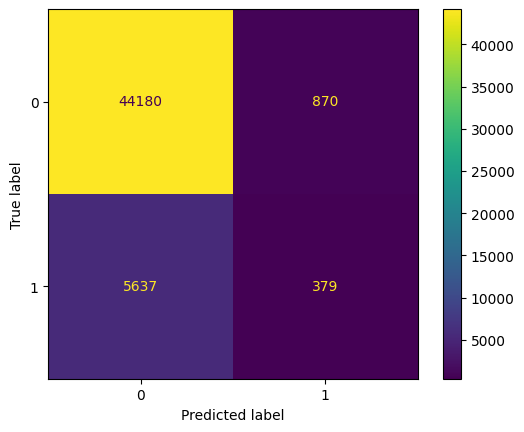

In [10]:
dis=ConfusionMatrixDisplay(con,display_labels=lab)
dis.plot()

In [11]:
score = accuracy_score(Y_test,y_pred)
score

0.8725766654917166

In [12]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     45050
           1       0.30      0.06      0.10      6016

    accuracy                           0.87     51066
   macro avg       0.60      0.52      0.52     51066
weighted avg       0.82      0.87      0.83     51066

